<a href="https://colab.research.google.com/github/BachokunIAR/DL-tensorflow/blob/main/tf_animal_class_transferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import os
from PIL import *

import PIL.Image as Image
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

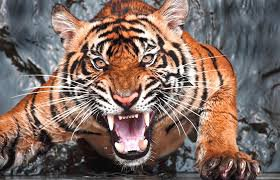

In [4]:
tiger =Image.open("/content/drive/MyDrive/Data/animal_class/tiger/20ba7edcc3.jpg")
tiger

In [5]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
]) # image height = 224, width = 224, color channel = 3

# <font color = red> Resizing the size of the image to (224,224)

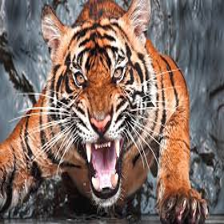

In [8]:
# Resizing the image

tiger = Image.open("/content/drive/MyDrive/Data/animal_class/tiger/20ba7edcc3.jpg").resize(IMAGE_SHAPE)
tiger

In [9]:
tiger = np.array(tiger)/255.0
tiger # converting the image to numpy arrays

array([[[0.40784314, 0.41176471, 0.42745098],
        [0.45490196, 0.45882353, 0.48235294],
        [0.65882353, 0.65882353, 0.69019608],
        ...,
        [0.25490196, 0.28235294, 0.31372549],
        [0.21568627, 0.24313725, 0.2745098 ],
        [0.20784314, 0.23529412, 0.26666667]],

       [[0.39607843, 0.4       , 0.41960784],
        [0.43529412, 0.43921569, 0.4627451 ],
        [0.65098039, 0.65490196, 0.68627451],
        ...,
        [0.25098039, 0.27843137, 0.30980392],
        [0.21568627, 0.24313725, 0.2745098 ],
        [0.21176471, 0.23921569, 0.27058824]],

       [[0.38039216, 0.38431373, 0.40392157],
        [0.41960784, 0.42352941, 0.44705882],
        [0.65098039, 0.65098039, 0.68235294],
        ...,
        [0.23921569, 0.26666667, 0.29803922],
        [0.21568627, 0.24313725, 0.2745098 ],
        [0.21568627, 0.24313725, 0.2745098 ]],

       ...,

       [[0.15686275, 0.14117647, 0.12941176],
        [0.16470588, 0.15294118, 0.14509804],
        [0.16470588, 0

# <font color = red> Now lets predict the image label for the tiger

In [10]:
tiger.shape

(224, 224, 3)

In [11]:
tiger[np.newaxis,...].shape # this add a new dimension to the image

(1, 224, 224, 3)

In [12]:
results = classifier.predict(tiger[np.newaxis,...])
results

1/1 [==============================] - 1s 1s/step


array([[ 0.19669002,  0.7993083 , -0.17622137, ...,  0.2324718 ,
        -0.41601557,  0.07295319]], dtype=float32)

In [14]:
results.shape

(1, 1001)

In [15]:
predicted_label_index = np.argmax(results)
predicted_label_index

293

In [16]:
image_labels = []
with open("/content/drive/MyDrive/Data/flower_photos/ImageNetLabels.txt", "r") as f:
  image_labels = f.read().splitlines()
image_labels[:10]

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen']

In [17]:
image_labels[predicted_label_index]

'tiger'

beautiful

# <font color = red>Lets predict another iamge

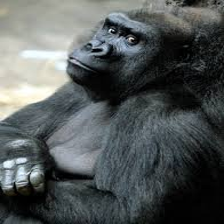

In [20]:
goril = Image.open("/content/drive/MyDrive/Data/animal_class/gorilla/250ce0a66d.jpg").resize(IMAGE_SHAPE)
goril

In [21]:
goril = np.array(goril)/255.0
goril.shape

(224, 224, 3)

In [22]:
goril[np.newaxis,...].shape

(1, 224, 224, 3)

In [23]:
results1 = classifier.predict(goril[np.newaxis,...])
results1

1/1 [==============================] - 0s 157ms/step


array([[ 0.33653036, -0.12971431,  0.4719985 , ..., -0.00999616,
         0.23949447, -0.693464  ]], dtype=float32)

In [24]:
predicted_label_index = np.argmax(results1)
predicted_label_index

367

In [25]:
#image_labels[predicted_labebel_idex]
image_labels[predicted_label_index]

'gorilla'

beatiful!!!

# <font color = red> Getting the animal dataset ready

In [26]:
data_dir = ("/content/drive/MyDrive/Data/animal_class")
data_dir

'/content/drive/MyDrive/Data/animal_class'

In [27]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/Data/animal_class')

In [28]:
list(data_dir.glob('*/*jpg'))[:10]

[PosixPath('/content/drive/MyDrive/Data/animal_class/eagle/07c29966bd.jpg'),
 PosixPath('/content/drive/MyDrive/Data/animal_class/eagle/08bbadef2b.jpg'),
 PosixPath('/content/drive/MyDrive/Data/animal_class/eagle/07a8e4b860.jpg'),
 PosixPath('/content/drive/MyDrive/Data/animal_class/eagle/0a249855c4.jpg'),
 PosixPath('/content/drive/MyDrive/Data/animal_class/eagle/0572b4375b.jpg'),
 PosixPath('/content/drive/MyDrive/Data/animal_class/eagle/29c53bd78f.jpg'),
 PosixPath('/content/drive/MyDrive/Data/animal_class/eagle/17becae335.jpg'),
 PosixPath('/content/drive/MyDrive/Data/animal_class/eagle/4c6fc22af0.jpg'),
 PosixPath('/content/drive/MyDrive/Data/animal_class/eagle/3df1379a57.jpg'),
 PosixPath('/content/drive/MyDrive/Data/animal_class/eagle/5c75295aec.jpg')]

In [29]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

840


In [30]:
eagle = list(data_dir.glob('eagle/*'))
eagle[:5]

[PosixPath('/content/drive/MyDrive/Data/animal_class/eagle/07c29966bd.jpg'),
 PosixPath('/content/drive/MyDrive/Data/animal_class/eagle/08bbadef2b.jpg'),
 PosixPath('/content/drive/MyDrive/Data/animal_class/eagle/07a8e4b860.jpg'),
 PosixPath('/content/drive/MyDrive/Data/animal_class/eagle/0a249855c4.jpg'),
 PosixPath('/content/drive/MyDrive/Data/animal_class/eagle/0572b4375b.jpg')]

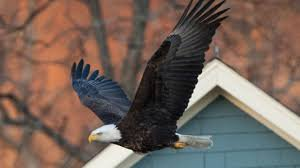

In [31]:
Image.open(str(eagle[3]))

In [32]:
koala = list(data_dir.glob('koala/*'))
koala[:5]

[PosixPath('/content/drive/MyDrive/Data/animal_class/koala/0042f2effe.jpg'),
 PosixPath('/content/drive/MyDrive/Data/animal_class/koala/063ba52395.jpg'),
 PosixPath('/content/drive/MyDrive/Data/animal_class/koala/09d035c85d.jpg'),
 PosixPath('/content/drive/MyDrive/Data/animal_class/koala/2f07008106.jpg'),
 PosixPath('/content/drive/MyDrive/Data/animal_class/koala/3f4b2076a8.jpg')]

# <font color = green> Read animal images from disk into numpy array using opencv

In [33]:
animal_images_dict = {
    'eagle': list(data_dir.glob('eagle/*')),
    'elephant': list(data_dir.glob('elephant/*')),
    'fly': list(data_dir.glob('fly/*')),
    'goose': list(data_dir.glob('goose/*')),
    'gorilla': list(data_dir.glob('gorilla/*')),
    'koala': list(data_dir.glob('koala/*')),
    'ladybugs': list(data_dir.glob('ladybugs/*')),
    'leopard': list(data_dir.glob('leopard/*')),
    'lion': list(data_dir.glob('lion/*')),
    'mouse': list(data_dir.glob('mouse/*')),
    'porcupine': list(data_dir.glob('porcupine/*')),
    'tiger': list(data_dir.glob('tiger/*')),
    'wombat': list(data_dir.glob('wombat/*')),
    'zebra': list(data_dir.glob('zebra/*')),


}

In [34]:
animal_label_dict = {
    'eagle':0,
    'elephant': 1,
    'fly': 2,
    'goose': 3,
    'gorilla': 4,
    'koala': 5,
    'ladybugs': 6,
    'leopard': 7,
    'lion': 8,
    'mouse': 9,
    'porcupine': 10,
    'tiger': 11,
    'wombat':12,

    'zebra': 13,
}

In [35]:
img = cv2.imread(str(animal_images_dict['eagle'][0]))
img.shape

(1280, 914, 3)

In [36]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [37]:
X, y = [], []

for animal_name, images in animal_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(IMAGE_SHAPE)) # resize allthe iamges to thesamae size
        X.append(resized_img)
        y.append(animal_label_dict[animal_name])

In [38]:
X = np.array(X)
y = np.array(y)

# <font color =green> Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, random_state= 42, )

# <font color = green> Prepocessing and simage scaling

In [40]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

# Make prediction using pre-trained model on new animal dataset

In [41]:
X[0].shape

(224, 224, 3)

In [42]:
IMAGE_SHAPE+ (3,)

(224, 224, 3)

In [43]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)
x3_resized = cv2.resize(X[3], IMAGE_SHAPE)
x4_resized = cv2.resize(X[4], IMAGE_SHAPE)

x5_resized = cv2.resize(X[5], IMAGE_SHAPE)
x6_resized = cv2.resize(X[6], IMAGE_SHAPE)
x7_resized = cv2.resize(X[7], IMAGE_SHAPE)
x8_resized = cv2.resize(X[8], IMAGE_SHAPE)
x9_resized = cv2.resize(X[9], IMAGE_SHAPE)
x10_resized = cv2.resize(X[10], IMAGE_SHAPE)
x11_resized = cv2.resize(X[11], IMAGE_SHAPE)
x12_resized = cv2.resize(X[12], IMAGE_SHAPE)
x13_resized = cv2.resize(X[13], IMAGE_SHAPE)


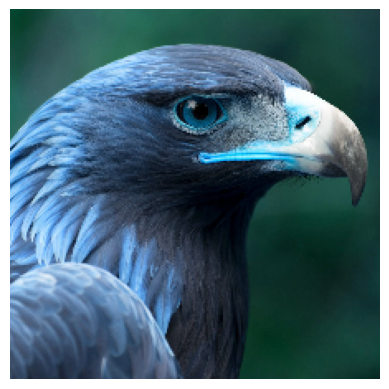

In [44]:
plt.axis(False)
plt.imshow(X[13]);

In [45]:
predicted = classifier.predict(np.array([x11_resized, x12_resized, x13_resized,x4_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 654ms/step


array([722, 550, 722, 795])

In [46]:
image_labels[460]

'brassiere'

# <font color = red> Now take pre-trained model and retrain it using animal images

In [47]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [48]:
num_of_animals = 14 # there are 5 flower types

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_animals)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 14)                17934     
                                                                 
Total params: 2275918 (8.68 MB)
Trainable params: 17934 (70.05 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [49]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
20/20 [==============================] - 39s 2s/step - loss: 1.7902 - acc: 0.5349
Epoch 2/10
20/20 [==============================] - 22s 1s/step - loss: 0.3987 - acc: 0.9651
Epoch 3/10
20/20 [==============================] - 26s 1s/step - loss: 0.1510 - acc: 0.9905
Epoch 4/10
20/20 [==============================] - 23s 1s/step - loss: 0.0925 - acc: 0.9984
Epoch 5/10
20/20 [==============================] - 26s 1s/step - loss: 0.0654 - acc: 0.9984
Epoch 6/10
20/20 [==============================] - 22s 1s/step - loss: 0.0505 - acc: 1.0000
Epoch 7/10
20/20 [==============================] - 25s 1s/step - loss: 0.0398 - acc: 1.0000
Epoch 8/10
20/20 [==============================] - 23s 1s/step - loss: 0.0328 - acc: 1.0000
Epoch 9/10
20/20 [==============================] - 26s 1s/step - loss: 0.0276 - acc: 1.0000
Epoch 10/10
20/20 [==============================] - 23s 1s/step - loss: 0.0237 - acc: 1.0000
